**Nama : Muhammad Nizar Amirullah**

**Nim : 211351096**

**Kelas : Pagi A**

#Import library yang di butuhkan

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import tree
import graphviz
from sklearn.svm import SVC
from sklearn.tree import plot_tree
import pickle

#Import Dataset Kaggle

In [80]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"inizar","key":"51be1fbce52846ee2755959cc793a751"}'}

In [81]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [82]:
!kaggle datasets download -d uciml/iris

iris.zip: Skipping, found more recently modified local copy (use --force to force download)


In [83]:
!mkdir iris
!unzip iris.zip -d iris
!ls iris

mkdir: cannot create directory ‘iris’: File exists
Archive:  iris.zip
replace iris/Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: iris/Iris.csv           
replace iris/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: iris/database.sqlite    
database.sqlite  Iris.csv


#Data Discovery

In [84]:
df = pd.read_csv("/content/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [86]:
df.shape

(150, 6)

In [87]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [88]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [89]:
df.drop('Id', axis=1, inplace=True)

In [90]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#EDA

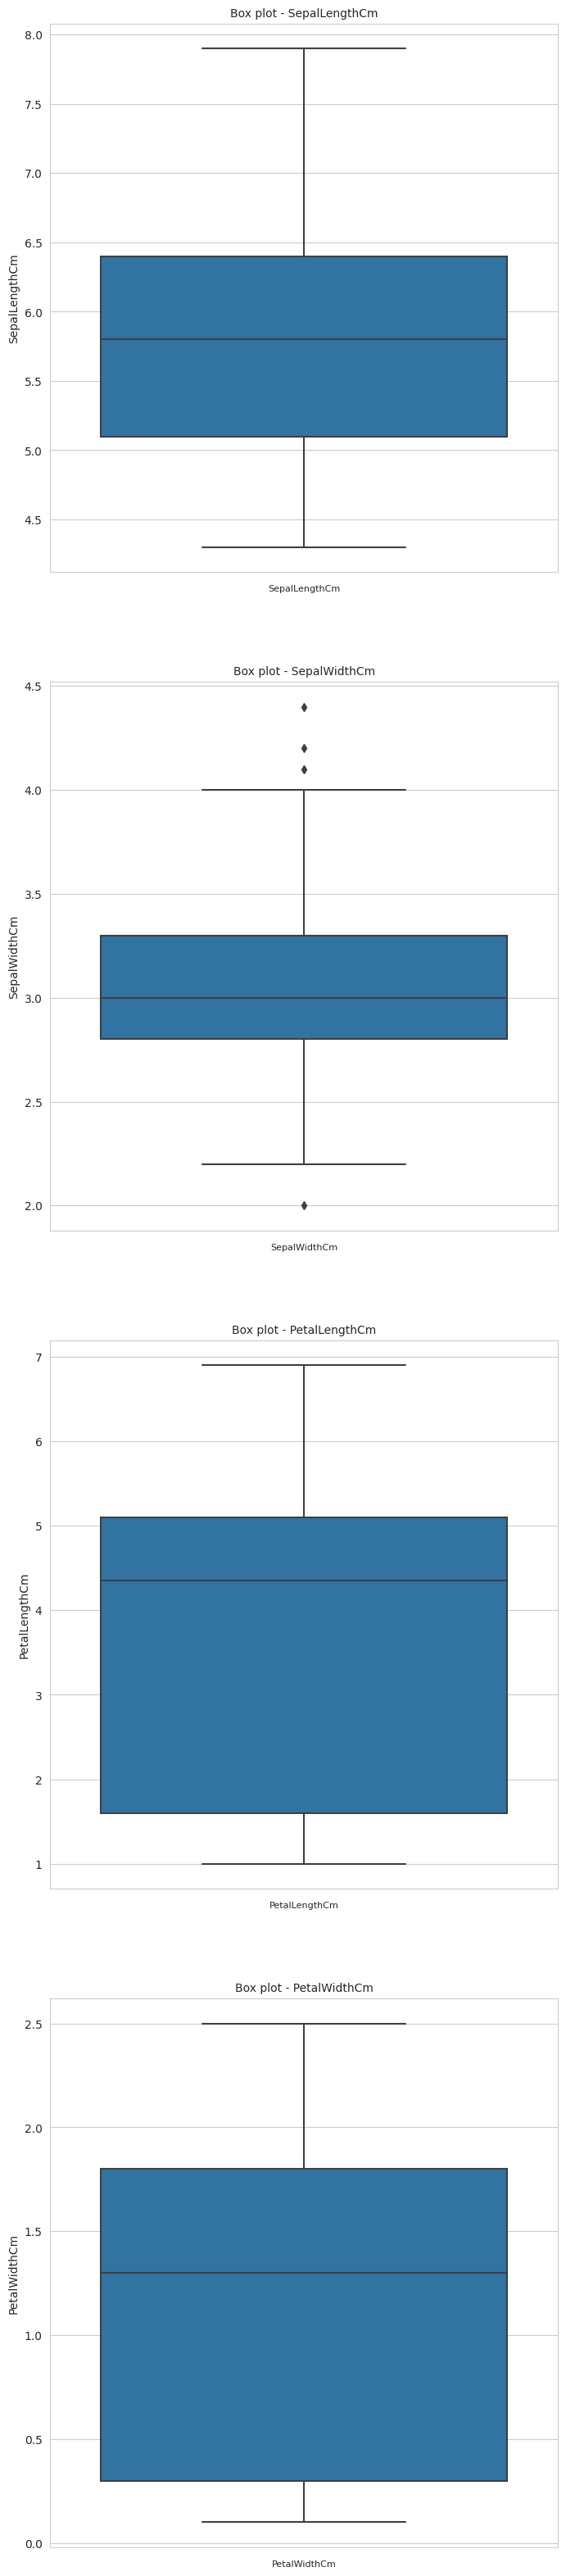

In [91]:
col_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


<ipython-input-92-818641ddc473>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_val], hist=True, ax=ax[i])
<ipython-input-92-818641ddc473>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_val], hist=True, ax=ax[i])
<ipython-input-92-818641ddc473>:5: UserWarning: 

`distplot` is a 

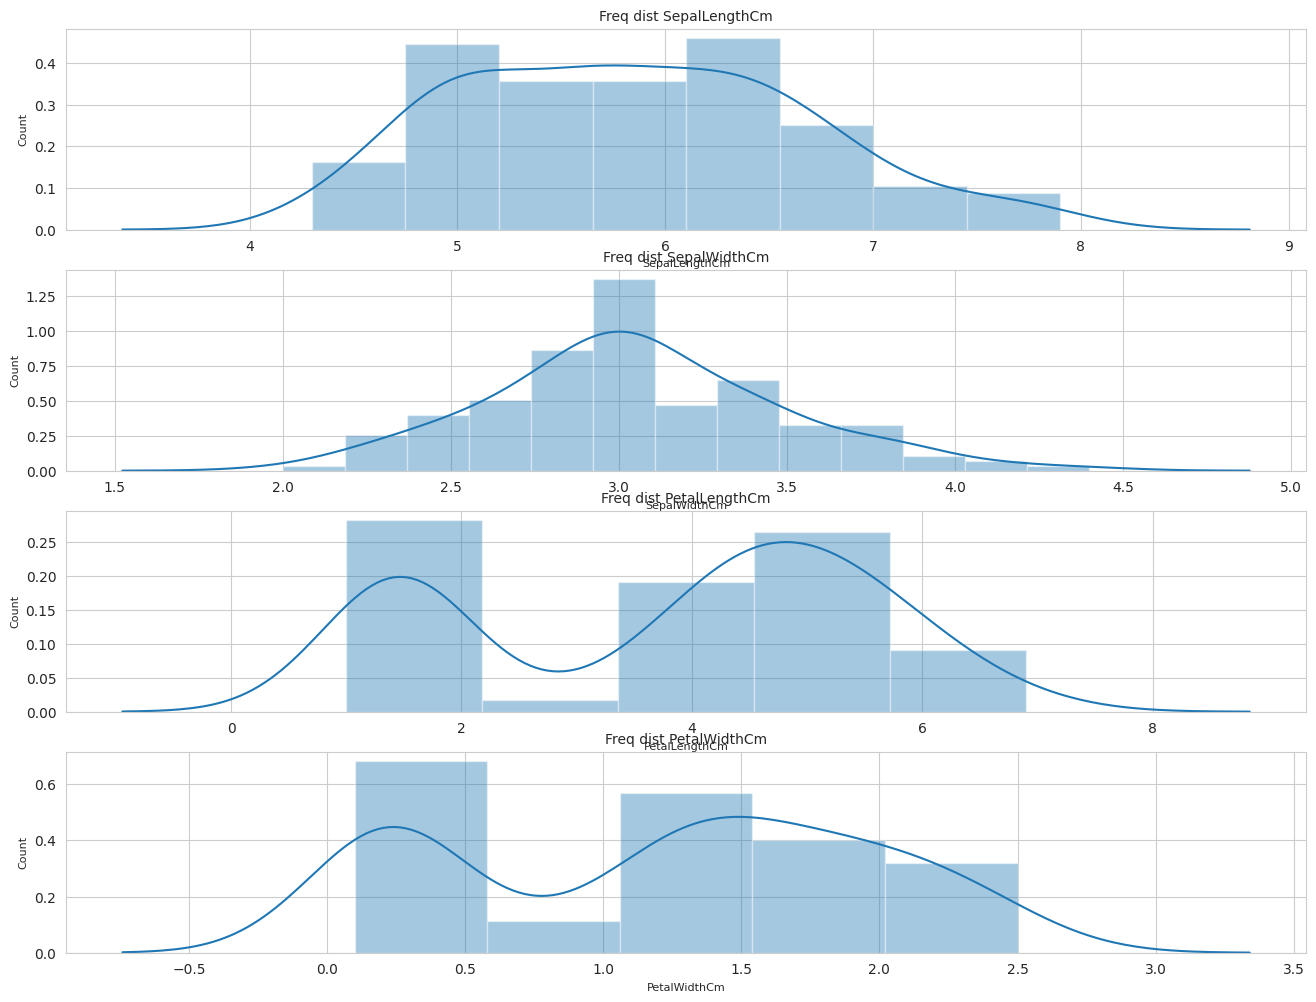

In [92]:
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

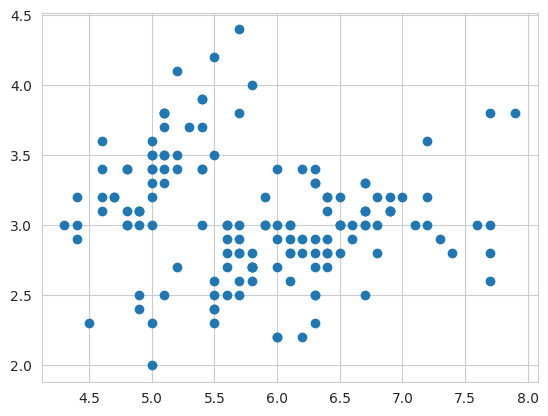

In [93]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

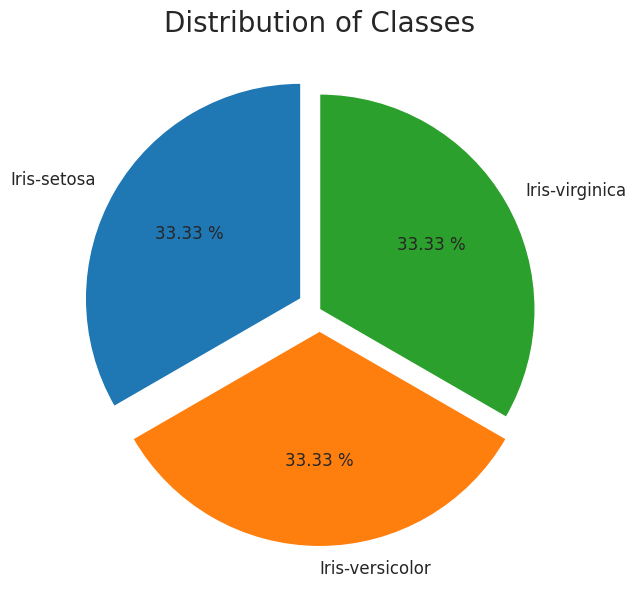

In [94]:
count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())
plt.figure(figsize = (10,7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

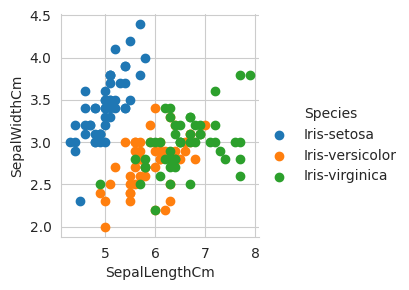

In [95]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

#Data Preparation

In [96]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [97]:
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
Y = df['Species']

In [98]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=123)

In [100]:
Xt, Xcv, Yt, Ycv = train_test_split(X_train, Y_train, test_size=0.10, random_state=42)

In [101]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, Y_train)

#Modeling

In [102]:
Y_pred = tree_model.predict(X_test)
acc_score= round(accuracy_score(Y_pred, Y_test), 3)
print('accuracy: ', acc_score)

accuracy:  0.867


In [103]:
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

2


In [104]:
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9170731707317072


In [105]:
Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8571428571428571


array([[[13,  0],
        [ 0,  1]],

       [[ 6,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  5]]])

In [106]:
YT_hat = Iris_clf.predict(X_test)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Y_test, YT_hat)*100,'%')
multilabel_confusion_matrix(Y_test , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 86.66666666666667 %


array([[[11,  0],
        [ 0,  4]],

       [[ 9,  1],
        [ 1,  4]],

       [[ 8,  1],
        [ 1,  5]]])

In [107]:
iris = load_iris()
X = iris.data
y = iris.target

tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

export_graphviz(
    tree_model,
    out_file="iris_tree.dot",
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
)


In [109]:
svm = SVC()
svm.fit(X_train, Y_train)
Y_predsvm = svm.predict(X_test)
acc_svm= accuracy_score(Y_predsvm, Y_test)
print('The accuracy for SVM is : ', acc_svm*100, '%')

The accuracy for SVM is :  93.33333333333333 %


In [110]:
Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Fclf.fit(X_train, Y_train)

DecisionTreeClassifier()

[Text(0.36363636363636365, 0.9285714285714286, 'x[2] <= -0.744\ngini = 0.667\nsamples = 135\nvalue = [46, 45, 44]'),
 Text(0.2727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]'),
 Text(0.45454545454545453, 0.7857142857142857, 'x[2] <= 0.621\ngini = 0.5\nsamples = 89\nvalue = [0, 45, 44]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 0.593\ngini = 0.087\nsamples = 44\nvalue = [0, 42, 2]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.2727272727272727, 0.5, 'x[1] <= -0.125\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.36363636363636365, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.7272727272727273, 0.6428571428571429, 'x[3] <= 0.725\ngini = 0.124\nsamples = 45\nvalue = [0, 3, 42]'),
 Text(0.6363636363636364, 0.5, 'x[1] <= -0.935\ngini = 0.49\nsamples = 7\nvalue = [0

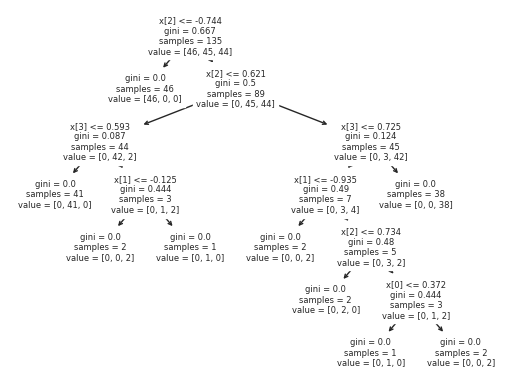

In [111]:
tree.plot_tree(Fclf)

#Visualisasi

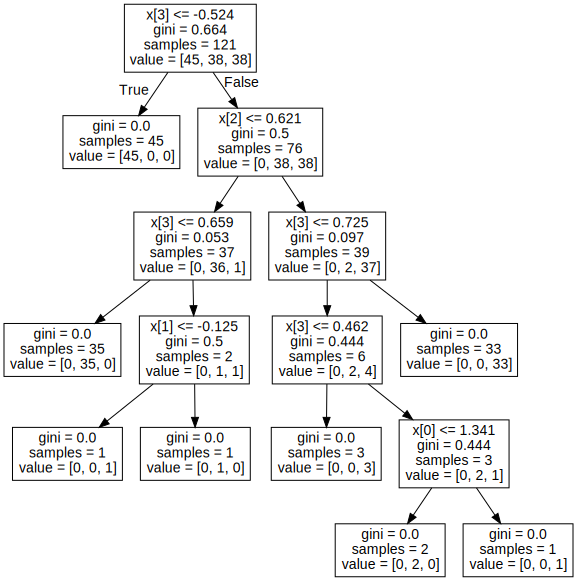

In [112]:
dot_df = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_df)
graph

#Saving Pickle

In [113]:
filename = 'iris.sav'
pickle.dump(tree_model.predict,open(filename,'wb'))